In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

#Importing the needed layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
#3 Determine how the images require preprocessing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
#4 Intialize the training and test seets, and resize them to a standard size

#Locate amnd assign Training Set (HAVE TO FLIP SLASHES)
train_set = train_datagen.flow_from_directory('D:/fruits-360/Training',
                                              target_size=(100,100),
                                              batch_size=32,
                                              class_mode='categorical', shuffle=True)

#Locate amnd assign Training Set (HAVE TO FLIP SLASHES)
test_set = test_datagen.flow_from_directory('D:/fruits-360/Test',
                                              target_size=(100,100),
                                              batch_size=32,
                                              class_mode='categorical', shuffle=True)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [4]:
#5 Define the CNN
model = Sequential()

model.add(Conv2D(16, (2,2), input_shape=(100, 100, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (2,2), activation = 'relu'))

model.add(Conv2D(64, (2,2), activation='relu'))
model.add(Conv2D(64, (2,2), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(units=150, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(units=131, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        2080      
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 64)        8256      
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                    

In [5]:
#6 Compiling the CNN
model.compile(optimizer='rmsprop', loss="categorical_crossentropy", metrics="accuracy")

In [6]:
#7 Train the network(while hinting how handling multiple ANNs would work)
cnn = model.fit_generator(generator = train_set,
                          steps_per_epoch = 1000,
                          epochs = 30,
                          validation_data = test_set,
                          validation_steps = 100)

C:\Users\Julian\AppData\Local\Temp\ipykernel_18468\677776709.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn = model.fit_generator(generator = train_set,


Epoch 1/30
1000/1000 [==============================] - 273s 272ms/step - loss: 2.2117 - accuracy: 0.4171 - val_loss: 0.6761 - val_accuracy: 0.8188
Epoch 2/30
1000/1000 [==============================] - 222s 222ms/step - loss: 0.6763 - accuracy: 0.7843 - val_loss: 0.4000 - val_accuracy: 0.8806
Epoch 3/30
1000/1000 [==============================] - 197s 197ms/step - loss: 0.4268 - accuracy: 0.8643 - val_loss: 0.1643 - val_accuracy: 0.9563
Epoch 4/30
1000/1000 [==============================] - 182s 182ms/step - loss: 0.3234 - accuracy: 0.8965 - val_loss: 0.2180 - val_accuracy: 0.9391
Epoch 5/30
1000/1000 [==============================] - 247s 247ms/step - loss: 0.2663 - accuracy: 0.9137 - val_loss: 0.1202 - val_accuracy: 0.9719
Epoch 6/30
1000/1000 [==============================] - 242s 241ms/step - loss: 0.2363 - accuracy: 0.9254 - val_loss: 0.2575 - val_accuracy: 0.9391
Epoch 7/30
1000/1000 [==============================] - 249s 249ms/step - loss: 0.2207 - accuracy: 0.9329 - val_

In [7]:
#Printing Classification Metrics. (new method)
cnn.history

{'loss': [2.2117371559143066,
  0.676342248916626,
  0.42681097984313965,
  0.3234165608882904,
  0.26628682017326355,
  0.23627857863903046,
  0.22068211436271667,
  0.20830774307250977,
  0.18753990530967712,
  0.18016578257083893,
  0.1737147867679596,
  0.1720775067806244,
  0.1627591997385025,
  0.16437965631484985,
  0.15380755066871643,
  0.1488317996263504,
  0.14546945691108704,
  0.1405104249715805,
  0.1386667937040329,
  0.13485178351402283,
  0.1378476917743683,
  0.13061010837554932,
  0.1273365318775177,
  0.1270318478345871,
  0.12220708280801773,
  0.12303359061479568,
  0.12938709557056427,
  0.11642556637525558,
  0.1190606951713562,
  0.11619047820568085],
 'accuracy': [0.41709375381469727,
  0.7842714190483093,
  0.8643437623977661,
  0.8964977860450745,
  0.9137499928474426,
  0.925406277179718,
  0.9328643083572388,
  0.9374374747276306,
  0.9421250224113464,
  0.9463727474212646,
  0.94962477684021,
  0.949999988079071,
  0.9537187218666077,
  0.9518749713897705

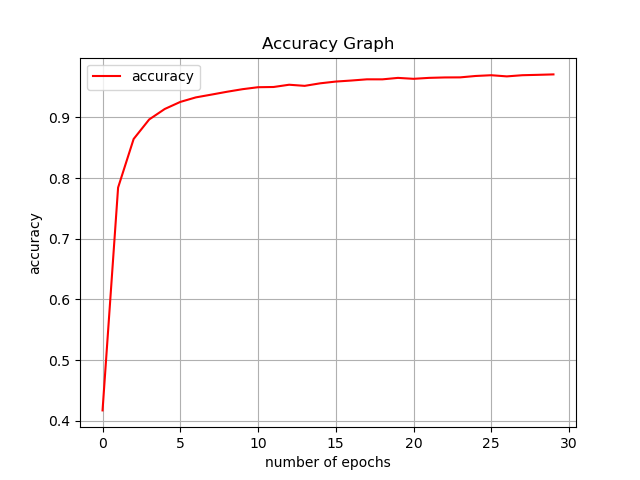

In [8]:
plt.plot(cnn.history["accuracy"], color = "r", label = "accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

In [9]:
#print confusion matrix of data
test_labels = test_set.labels
predictions = model.predict(test_set)

709/709 [==============================] - 32s 46ms/step


In [10]:
import numpy as np
predict_labels = np.argmax(predictions, axis = -1)

In [12]:
#Use a print array to plot a Confusion Matrix
from sklearn.metrics import confusion_matrix
np.set_printoptions(threshold= np.inf)

print("Confusion Matrix: \n", confusion_matrix(test_labels,predict_labels))

Confusion Matrix: 
 [[2 1 0 3 2 1 0 1 1 1 2 2 2 0 0 0 2 0 2 1 1 2 3 2 1 0 1 1 2 0 3 0 0 1 1 0
  2 0 1 2 1 1 0 0 1 2 2 1 2 1 1 3 3 3 1 1 0 0 0 0 0 1 1 0 2 3 0 3 3 0 1 1
  1 3 1 1 0 2 0 1 0 3 2 0 2 1 4 0 0 2 1 3 2 1 2 0 5 0 1 1 1 1 0 2 1 2 0 0
  3 1 1 0 2 0 1 1 1 2 0 1 1 2 3 2 4 1 2 2 2 2 0]
 [0 1 0 2 1 1 1 0 1 2 0 1 2 0 2 0 0 1 3 1 0 2 1 0 0 3 1 1 2 1 1 2 0 0 5 0
  4 0 1 1 2 3 0 2 2 0 1 0 1 0 1 0 0 1 2 1 1 4 0 1 3 2 2 0 1 3 3 0 2 0 1 0
  1 0 2 1 0 2 1 1 0 1 1 1 1 0 2 1 1 0 3 2 2 0 2 1 2 2 2 3 0 0 2 0 0 3 1 0
  2 1 0 1 0 0 0 1 1 2 1 0 2 0 1 0 2 3 0 1 3 2 1]
 [0 0 0 0 4 0 2 1 0 0 1 2 1 0 0 1 0 0 0 1 0 3 0 0 4 4 1 2 1 0 0 0 3 2 2 0
  0 3 1 0 1 1 0 1 4 1 1 5 1 1 3 0 0 0 1 1 1 2 1 3 1 0 1 2 3 1 2 1 2 2 2 0
  0 3 1 1 1 0 1 1 2 0 2 1 1 2 2 0 2 4 1 1 1 2 2 1 0 1 1 2 0 1 0 1 2 2 2 1
  2 0 1 1 0 2 4 2 2 1 0 2 1 0 3 0 2 2 0 2 0 3 1]
 [0 1 0 1 0 0 2 2 3 1 2 1 4 0 1 1 0 2 2 0 1 0 2 2 1 1 0 3 2 4 1 2 0 0 0 0
  0 0 1 2 0 3 1 3 3 1 0 0 1 2 1 0 3 0 2 1 4 2 0 1 1 0 1 3 0 1 1 2 1 1 1 1
  1 0 0 3 2 0 0 3 1

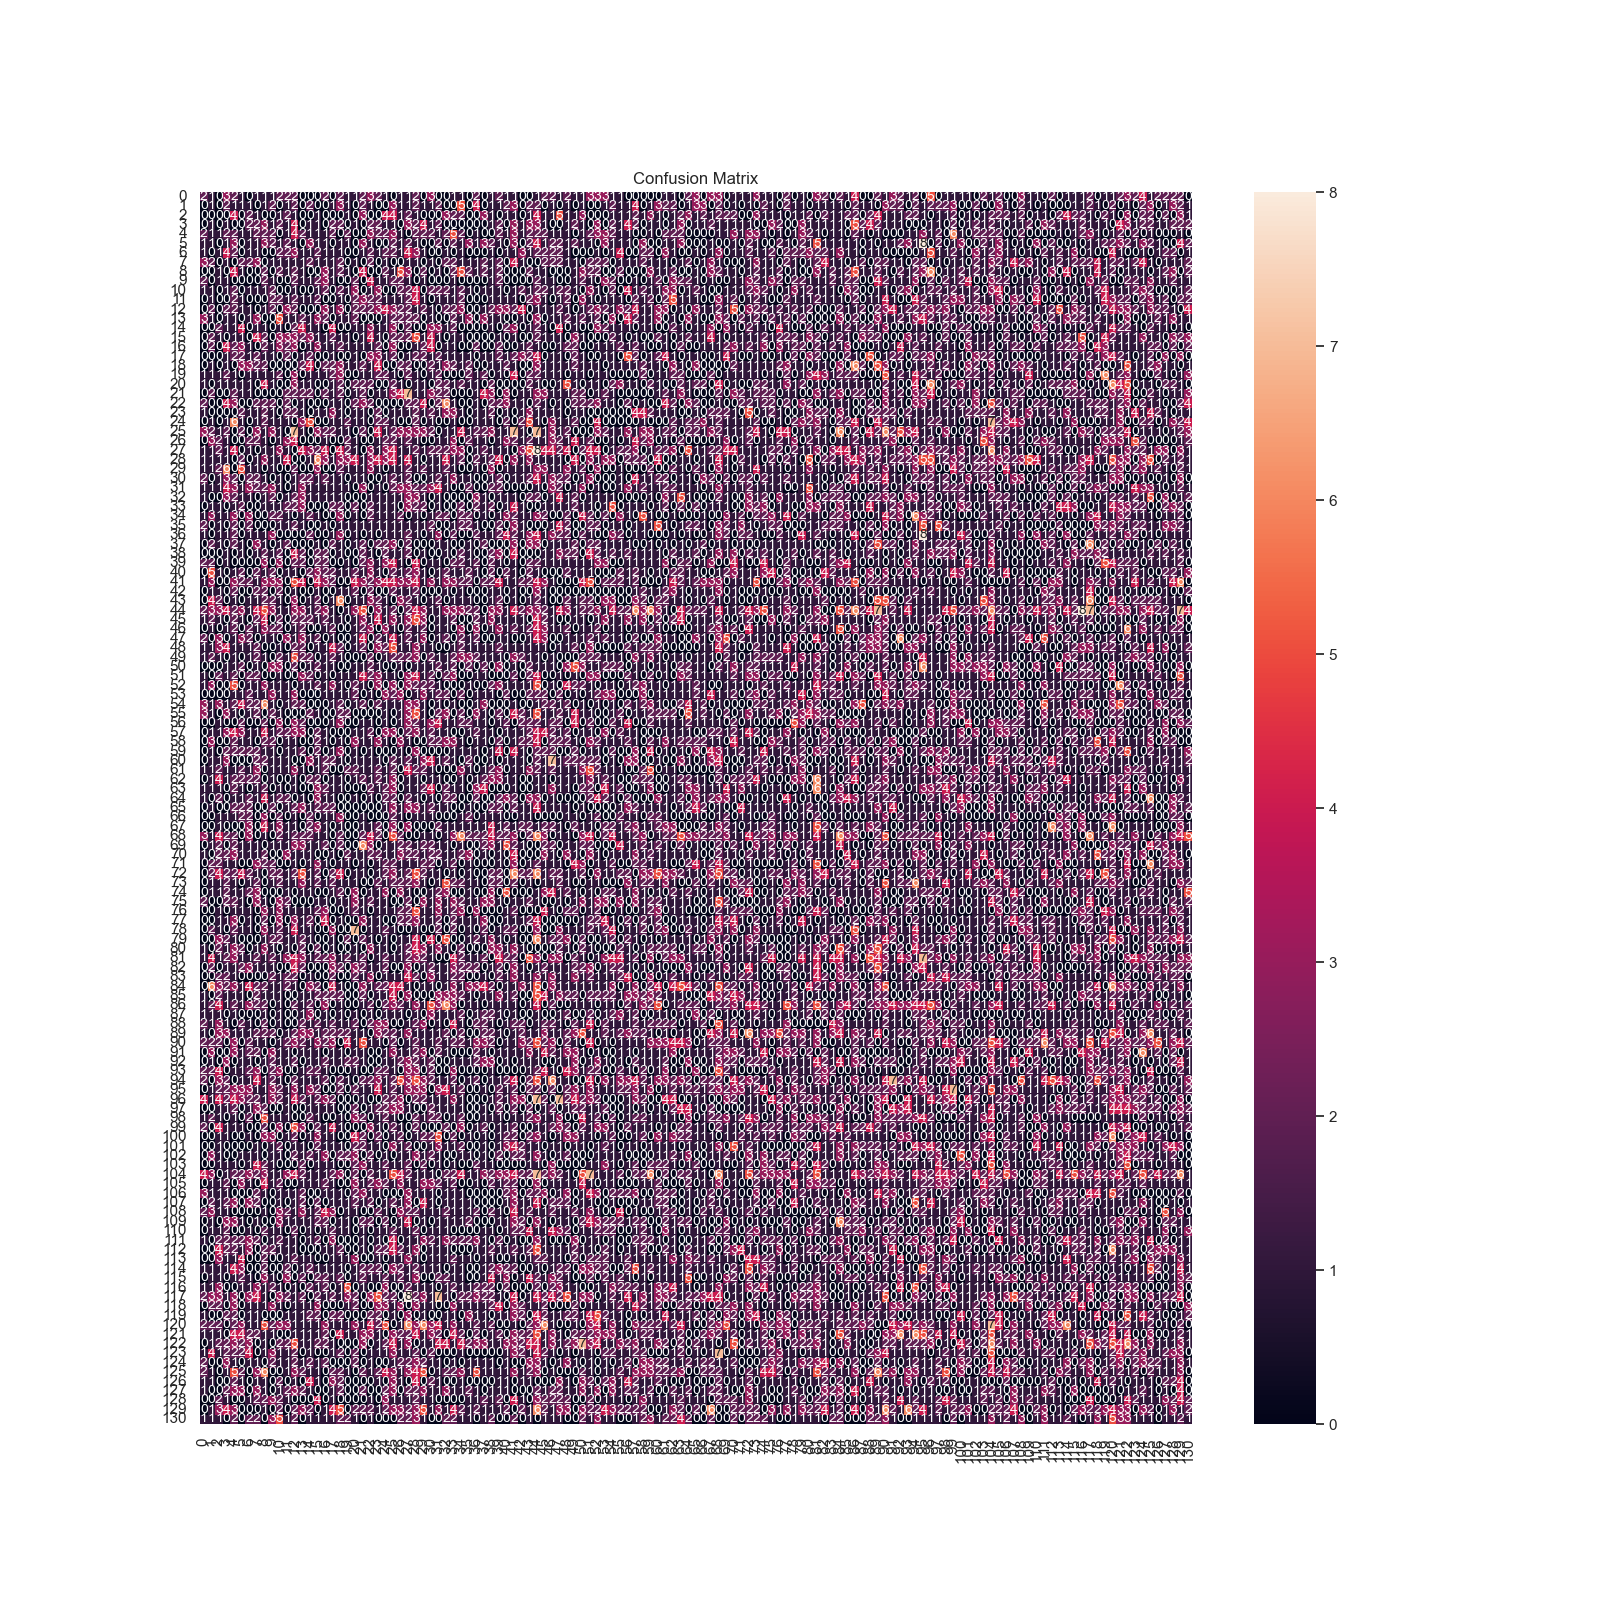

In [14]:
#Use a heatmap to plot the confusion matrix
import seaborn as sns
sns.set(font_scale=1.0)
plt.figure(figsize = (16,16))

CM = confusion_matrix(test_labels, predict_labels)
ax = plt.axes()

sns.heatmap(CM, annot=True,
            annot_kws={"size": 10},
            fmt = "d",
            xticklabels = range(0,131),
            yticklabels = range(0,131), ax = ax)
ax.set_title('Confusion Matrix')

plt.show()